# Histogram & Yoğunluk

NOT : Histogram ve Yoğunluk Grafikleri Sürekli Değişkenleri Görselleştirmek İçin Kullanılır.

In [13]:
import seaborn as sns
diamonds = sns.load_dataset('diamonds')
df = diamonds.copy()
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [15]:
from pandas.api.types import CategoricalDtype

In [18]:
# Sıralı Nominal Değerleri Ordinal Kategorik değişken türüne dönüştürme
df.cut = df.cut.astype(CategoricalDtype(ordered = True))
df.color = df.color.astype(CategoricalDtype(ordered = True))
df.clarity = df.clarity.astype(CategoricalDtype(ordered = True))

In [19]:
cat_kategoriler = ['Fair','Good','Very Good', 'Premium', 'Ideal']

In [20]:
df.cut = df.cut.astype(CategoricalDtype(categories = cat_kategoriler, ordered = True))

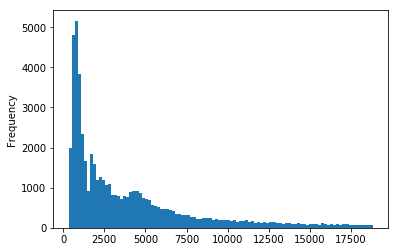

In [17]:
(df['price']
.plot
.hist(bins = 100));

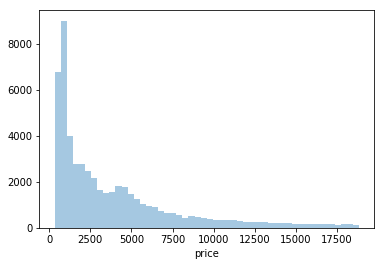

In [4]:
# sns kullanarak görselleştirme
# Sadece histogram görüntülüyor
sns.distplot(df.price, kde = False);

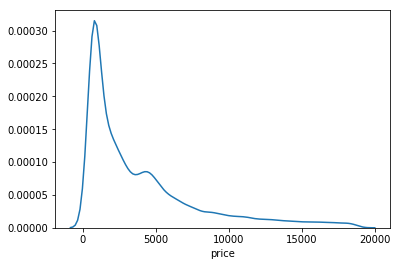

In [8]:
# Sadece Yoğunluk görüntülüyor.
sns.distplot(df.price, hist = False);

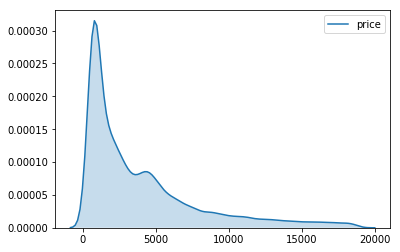

In [9]:
# Yoğunluk grafiğinin altını dolu bir şekilde göstermek için
sns.kdeplot(df.price, shade = True);

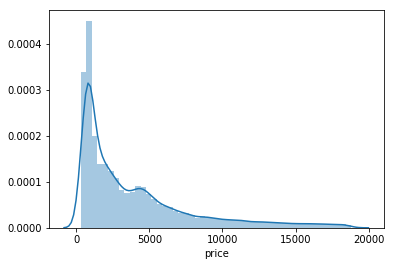

In [7]:
# Histogram ve yoğunluğu birlikte görüntülüyor.
sns.distplot(df.price);

Bu grafiklere analiz yapacak olursak histogram ve yoğunluk grafiklerini kullanarak 'price' değişkeninin tek başına olan durumunu değerlendiriyoruz.
Aslında bize lazım olan şey bu dağılımın arka taraftaki bu değişkenliğinin nasıl oluştuğu bilgisidir.

Bu bilgilere ulaşmak için diğer değişkenler ile aralarında çaprazlamalar yapılması gerekir.

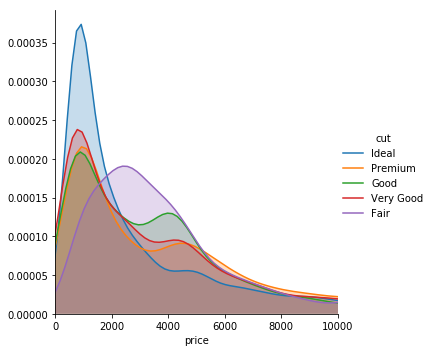

In [11]:
#FaceGrid() --> Grafik bölme işlemleri için kullanılır.
# add_legend() --> Grafikle ilgili bilgilendirme eklemek için kullanılır.

(sns
    .FacetGrid(df,
             hue = 'cut',
             height = 5,
             xlim = (0,10000))
    .map(sns.kdeplot, 'price', shade = True)
    .add_legend()
    );

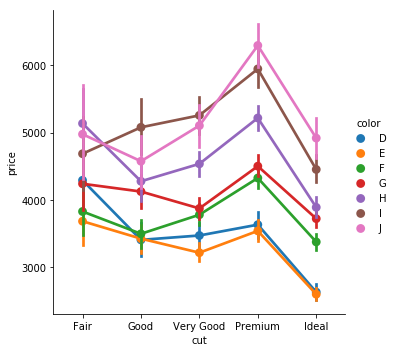

In [21]:
sns.catplot(x = 'cut', y = 'price', hue = 'color', kind = 'point', data = df);

Bu grafikte 'Price' değişkeninin farklı seviyelerinde 
iki farklı kategorik değişkenin etkilerini gözlemleyebiliyoruz.